# PDE: Finite difference method

In [196]:
import matplotlib.pyplot as plt

to_plot = [ {'data': [[0]*6, list(range(6))],
             'color':'r',
             'title':'Our interests'},
           {'data': [list(range(6))+[5]*6+list(range(6)), [0]*6+list(range(6))+[5]*6],
            'color' : 'g',
            'title' : 'Boundary and initial conditions'
           },] + [
           {'data': [[i]*6, list(range(6))],
            'color' : 'g',
            'title' : f'Step {5-i}'
           } for i in range(4,-1,-1)]
           

def my_illustration_plot(to_plot):
    for x in to_plot:
        plt.scatter(*x['data'], s=300, c=x['color'])
        plt.title(x['title'])
    plt.axis('off')
    plt.xlim(-1,6)
    plt.show()
    



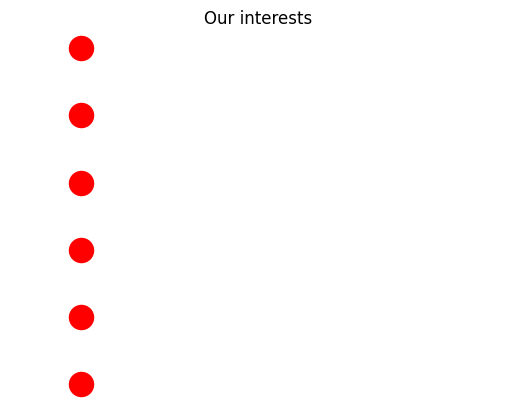

In [197]:
my_illustration_plot(to_plot[:1])

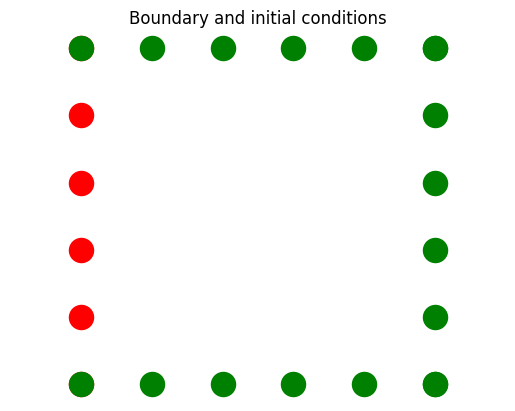

In [198]:
my_illustration_plot(to_plot[:2])

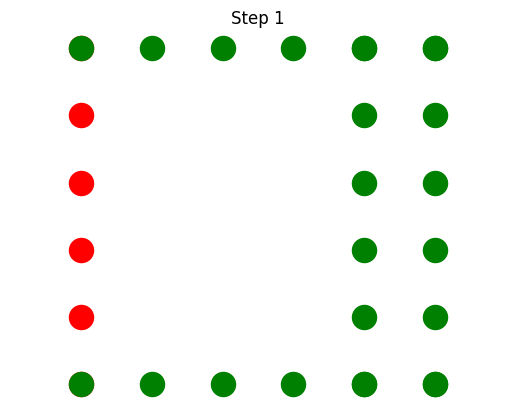

In [201]:
my_illustration_plot(to_plot[:3])

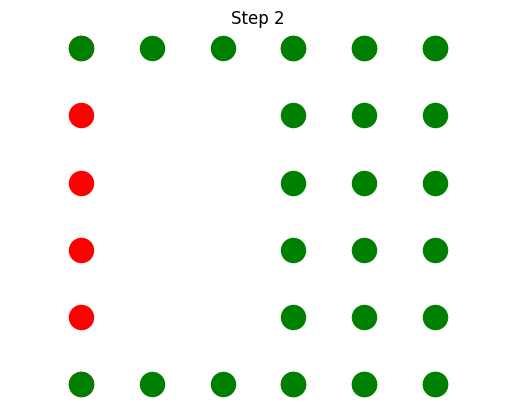

In [202]:
my_illustration_plot(to_plot[:4])

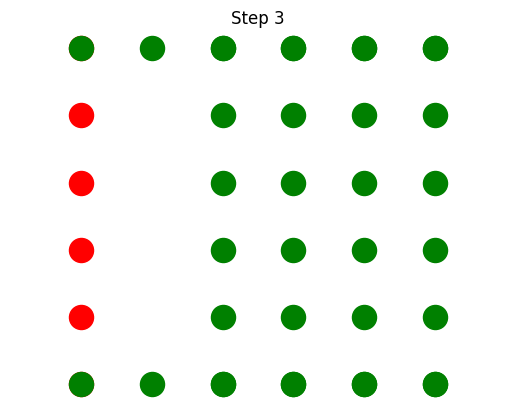

In [203]:
my_illustration_plot(to_plot[:5])

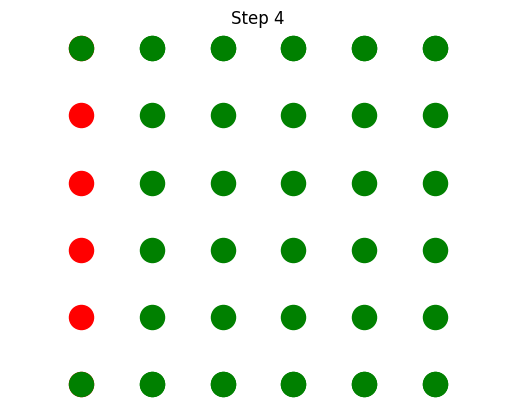

In [204]:
my_illustration_plot(to_plot[:6])

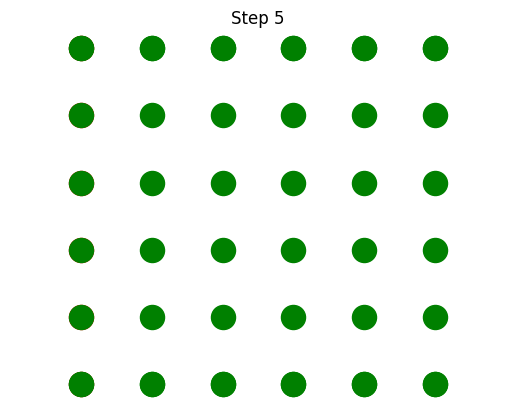

In [205]:
my_illustration_plot(to_plot[:7])

# Heat equation in 1D

$$\frac{\partial u}{\partial t} = \frac{\partial^2 u}{\partial x ^2}$$

# Finite differences:

## Forward difference: $f'(x) \approx \frac{f(x+h)-f(x)}{h}$
## Central difference: $f'(x) \approx \frac{f(x+h)-f(x-h)}{2h}$
## Backward difference: $f'(x) \approx \frac{f(x)-f(x-h)}{h}$

In [206]:
from typing import Callable
def first_order_finite_diff(diff_type: str, x: float, h: float, my_func: Callable):
    SHIFTS = {'forward': (0., 1.),
             'central': (-1., 1.),
             'backward': (-1., 0)}
    diff_lower = diff_type.lower()
    assert diff_lower in SHIFTS, f"The provided diff_type='{diff_type}' not in {SHIFTS}"
    assert h > 0, f"The provided h={h} <= 0."
    
    x_low, x_high = (x+h*shift for shift in SHIFTS[diff_lower])
    
    return (my_func(x_high)-my_func(x_low))/(x_high-x_low)
    
first_order_finite_diff("forward", 0, 1, lambda x: x*x+5)

1.0

In [207]:
import matplotlib.pyplot as plt
import numpy as np

# Illustrate the finite differences on any function
my_func = lambda x : np.square(x)+5
x0 = 1.0
h = 1.0

x = np.linspace(x0-1.2*h, x0+1.2*h, num=50)
f = my_func(x)

types = {"forward": (0., 1.), "central": (-1., 1.), "backward": (-1., 0.)}
slopes = {key:first_order_finite_diff(key, x0, h, my_func) for key in types.keys()}

data = [("f(x)", x, f),]
for name, shifts in types.items():
    x_values = np.array([x0+shifts[0]*h, x0+shifts[1]*h])
    y_values = my_func(x0)+slopes[name]*(x_values-x0)
    data.append((name, x_values, y_values))

<bound method Axes.plot of <Axes: >>

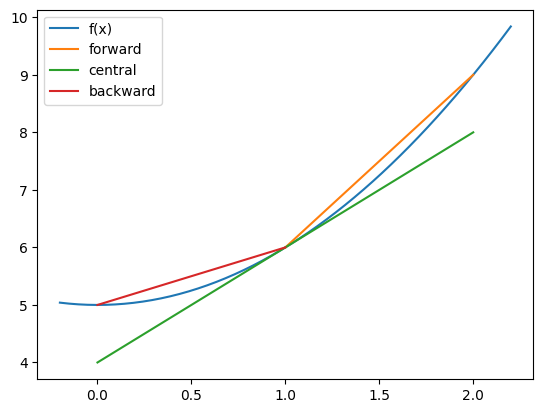

In [3]:
fig, ax = plt.subplots()
for label, x, y in data:
    ax.plot(x, y, label=label)
    
ax.legend()
ax.plot

Similarly for second order differnces:
* Forward: $f''(x) \approx \frac{\frac{f(x+2h)-f(x+h)}{h}-\frac{f(x+h)-f(x)}{h}}{h} = \frac{f(x+2h)-2f(x+h)+f(x)}{h^2}$
* Central: $f''(x) \approx \frac{\frac{f(x+h)-f(x)}{h}-\frac{f(x)-f(x-h)}{h}}{h} = \frac{f(x+h)-2f(x)+f(x-h)}{h^2}$
* Backward: $f''(x) \approx \frac{\frac{f(x)-f(x-h)}{h}-\frac{f(x-h)-f(x-2h)}{h}}{h} = \frac{f(x)-2f(x-h)+f(x-2h)}{h^2}$

# Simple example:
## The heat equation:
* Diff eq.: $\frac{\partial U}{\partial t} = \frac{\partial ^2 U }{\partial x^2}$ or: $U_t=U_{xx}$
* Boundary condition: $U(0,t) = U(1,t)=0$
* Initial condition: $U(x,0) = U_0(x)$

In [4]:
import numpy as np
from matplotlib import cm
import matplotlib.pyplot as plt
# %matplotlib notebook

def heat_simple_solution(x, t):
    return 10.*np.exp(-1.0*np.pi**2.*t)*np.sin(np.pi * x)

def plot_2d(x_min_max_Nstep, y_min_max_Nstep, analytic_func=None, grid_values=None,
            labels={'x':'x', 'y':'t', 'z':'Value'}, z_lim=None):
    assert (analytic_func is not None or grid_values is not None), "Analytical function or grid_values needed as imput"
    for needed_label in ['x', 'y', 'z']:
        assert needed_label in labels, f"The {needed_label} is missing from {labels}"
    if grid_values is not None:
        exp_grid_shape = (y_min_max_Nstep[2], x_min_max_Nstep[2], )
        assert grid_values.shape == exp_grid_shape,\
                f"Incorrect Grid shape: expected: {exp_grid_shape}, actual: {grid_values.shape}"
    
    xs = np.linspace(*x_min_max_Nstep)
    ys = np.linspace(*y_min_max_Nstep)
    grid_x, grid_y = np.meshgrid(xs, ys)
    fig, ax = plt.subplots(subplot_kw={'projection': '3d'})
    if analytic_func is not None:
        values = analytic_func(grid_x, grid_y)
        ax.plot_surface(grid_x, grid_y, values, cmap=cm.coolwarm, linewidth=0, antialiased=False, alpha=0.8)
    if grid_values is not None:
        ax.plot_surface(grid_x, grid_y, grid_values, cmap=cm.coolwarm, linewidth=0, antialiased=False, alpha=0.8)
    ax.set_xlabel(labels['x'], fontweight='bold')
    ax.set_ylabel(labels['y'], fontweight='bold')
    ax.set_zlabel(labels['z'], fontweight='bold')
    if z_lim is not None:
        ax.set_zlim(*z_lim)
    plt.show()
    if analytic_func is not None and grid_values is not None:
        diff = grid_values-values
        fig, ax = plt.subplots(subplot_kw={'projection': '3d'})
        ax.plot_surface(grid_x, grid_y, diff, cmap=cm.coolwarm, linewidth=0, antialiased=False, alpha=0.8)
        ax.set_xlabel(labels['x'], fontweight='bold')
        ax.set_ylabel(labels['y'], fontweight='bold')
        ax.set_zlabel(labels['z'], fontweight='bold')
        ax.title.set_text("Diff")
        plt.show()

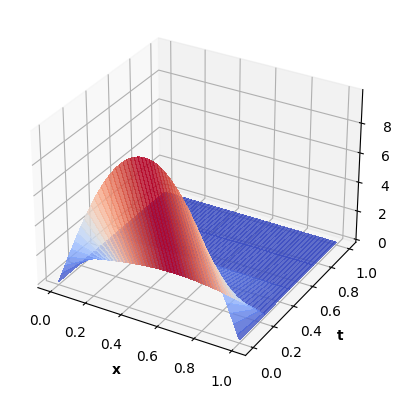

In [5]:
plot_2d((0., 1., 100), (0., 1., 5), heat_simple_solution, labels={'x':'x', 'y':'t', 'z':'Values'})

# TODO:
* Given: Initial condition $U(x, 0)$ 
* TODO: Find method for $U(x, t) \rightarrow U(x, t+\Delta t)$

## Create a grid as follows:
* Grid points: $u(x_j, t_n)$ or $u_{j,n}$ in short
* Grid partiion:
  * space: $x_0$=0, $x_1$, ... $x_J=1$, and $\Delta x := x_{i+1}-x_i = 1/J$
  * time: $t_0$=0, $t_1$, ... $t_N=T$, and $\Delta t := t_{i+1}-t_i = T/N$

[[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [3.09016994e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [5.87785252e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [8.09016994e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [9.51056516e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [1.00000000e+01 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [9.51056516e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [8.09016994e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]


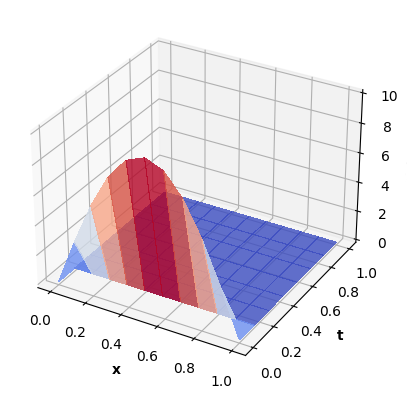

In [6]:
def get_my_heat_grid(J=20, N=20, T_max=1., initial_cond = lambda x: heat_simple_solution(x, 0)):
    dx = 1./(J-1)
    dt = T_max/(N-1)
    
    grid = np.zeros(shape=(J, N), dtype=float)
    grid[:,0] = heat_simple_solution(np.linspace(0.,1.,J), 0)
    
    return {"grid": grid, "dx": dx, "dt": dt}

x_step = 11
t_step = 8
my_grid = get_my_heat_grid(x_step,t_step)["grid"]
print(my_grid)

plot_2d((0, 1, x_step), (0, 1, t_step), grid_values=my_grid.T)

# Explicit method:
* **Forward** time difference
* Central space difference

$$U_t = U_{xx}$$
numerical diffs at $u(x_j, t_n)$:
$$\frac{u_{j, n+1}-u_{j, n}}{\Delta t} = \frac{u_{j+1, n}-2u_{j,n}+u_{j-1,n}}{\Delta x^2}$$

$$u_{j, n+1} = \left(1-2r\right) u_{j,n} + r(u_{j+1, n}+u_{j-1, n})$$

Where: $r = \Delta t/\Delta x^2$

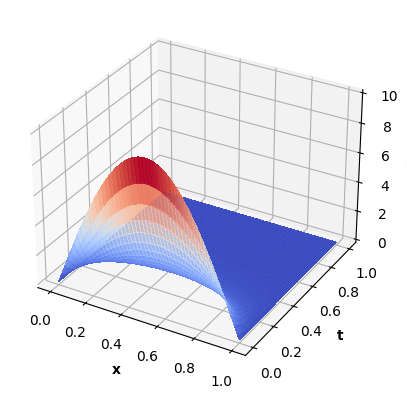

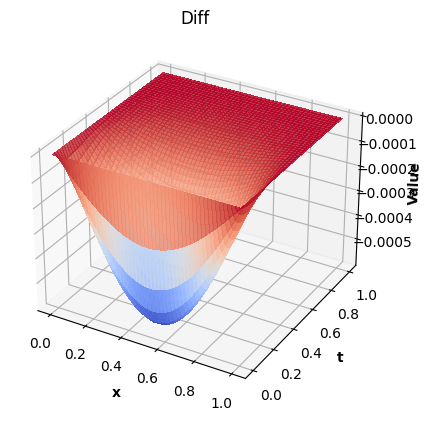

In [208]:
x_step = 100
t_step = 2*x_step**2

explicit = get_my_heat_grid(x_step, t_step)
explicit_grid = explicit["grid"]
explicit_dt = explicit["dt"]
explicit_dx = explicit["dx"]

explicit_r = explicit_dt/explicit_dx**2.0
# print(explicit_r)
for n in range(0,explicit_grid.shape[1]-1):
    for j in range(1,explicit_grid.shape[0]-1):
        explicit_grid[j,n+1] = (1.-2.*explicit_r)*explicit_grid[j,n] + explicit_r * (
            explicit_grid[j+1,n]+explicit_grid[j-1,n])

plot_2d((0, 1, x_step), (0, 1, t_step), analytic_func=heat_simple_solution, grid_values=explicit_grid.T, z_lim=(0,10.))

# Implicit method:
* **Backward** time difference
* Central space difference

$$U_t = U_{xx}$$
numerical diffs at $u(x_j, t_n)$:
$$\frac{u_{j, n}-u_{j, n-1}}{\Delta t} = \frac{u_{j+1, n}-2u_{j,n}+u_{j-1,n}}{\Delta x^2}$$

$$\left(1+2r\right) u_{j,n} - r(u_{j+1, n}+u_{j-1, n}) = u_{j, n-1} $$

$$\left(1+2r\right) u_{j,n} - r(u_{j+1, n}+u_{j-1, n}) = u_{j, n-1} $$

$$\underline{\underline{M}}\cdot \underline{U}_n = \underline {U}_{n-1}$$
Where:
* $M[j,j]=1+2r$,
* $M[j,j-1]=M[j, j+1]=-r$

$$\underline{U}_n =\underline{\underline{M}}^{-1}\cdot \underline {U}_{n-1}$$

[np.linalg.solve()](https://docs.scipy.org/doc/scipy/reference/generated/scipy.linalg.solve.html)

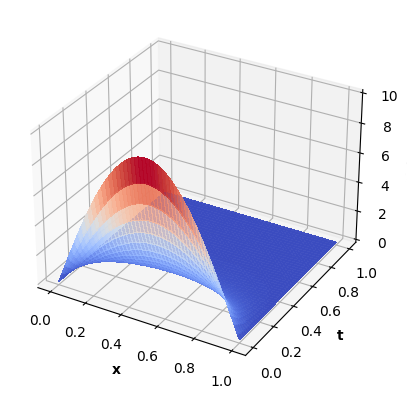

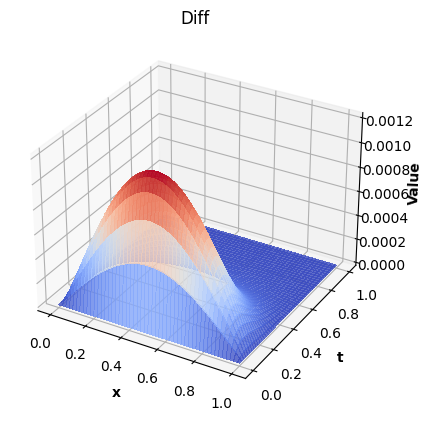

In [209]:
from scipy import linalg

x_step = 100
t_step = 2*x_step**2

implicit = get_my_heat_grid(x_step, t_step)
implicit_grid = implicit["grid"]
implicit_dx = implicit["dx"]
implicit_dt = implicit["dt"]
implicit_r = implicit_dt/implicit_dx**2.

# Forgotten boundary condition:
# When U_n[0]=U_n[-1]=0. boundary cond. is forgotten and lin. eq. sold for U_n[:], it leads to large errors on boundary.
# To check try this:
# implicit_M = np.diag([1+2*implicit_r]*(x_step))-implicit_r*(np.diag([1.]*(x_step-1), -1)+np.diag([1.]*(x_step-1), +1))
implicit_M = np.diag([1+2*implicit_r]*(x_step-2))-implicit_r*(np.diag([1.]*(x_step-3), -1)+np.diag([1.]*(x_step-3), +1))


for n in range(1, t_step):
#     implicit_grid[:,n] = linalg.solve(implicit_M, implicit_grid[:,n-1], assume_a='sym') #Forgotten boundary condition
#     implicit_grid[0,n] = 0.  #Forgotten boundary condition
#     implicit_grid[-1,n] = 0. #Forgotten boundary condition
    implicit_grid[1:-1,n] = linalg.solve(implicit_M, implicit_grid[1:-1,n-1], assume_a='sym')
    
#     print(implicit_grid[:,n])

plot_2d((0, 1, x_step), (0, 1, t_step), analytic_func=heat_simple_solution, grid_values=implicit_grid.T, z_lim=(0,10.))


# Crank-Nicolson method:
* Combine explicit and implicit method:
1. Take  explicit at $u(x_j, t_n)$:
$$\frac{u_{j, n+1}-u_{j, n}}{\Delta t} = \frac{u_{j+1, n}-2u_{j,n}+u_{j-1,n}}{\Delta x^2}$$
1. Take implicit at $u(x_j, t_{n+1})$:
$$\frac{u_{j, n+1}-u_{j, n}}{\Delta t} = \frac{u_{j+1, n+1}-2u_{j,n+1}+u_{j-1,n+1}}{\Delta x^2}$$
1. Average them:
$$\frac{u_{j, n+1}-u_{j, n}}{\Delta t} = \frac{1}{2}\left(\frac{u_{j+1, n}-2u_{j,n}+u_{j-1,n}}{\Delta x^2}+ \frac{u_{j+1, n+1}-2u_{j,n+1}+u_{j-1,n+1}}{\Delta x^2}\right)$$

$$\left(2+2r\right) u_{j,n+1} - r(u_{j+1, n+1}+u_{j-1, n+1}) = (2-2r)u_{j,n}+r(u_{j-1, n}+u_{j+1, n}) $$

$$\underline{\underline{M}}\underline{U}_{n+1}=\underline{\underline{A}}\underline{U}_{n}$$

$$\left(2+2r\right) u_{j,n+1} - r(u_{j+1, n+1}+u_{j-1, n+1}) = (2-2r)u_{j,n}+r(u_{j-1, n}+u_{j+1, n}) $$

$$\underline{\underline{M}}\underline{U}_{n+1}=\underline{\underline{A}}\underline{U}_{n}$$

In [9]:
x_step = 100
t_step = 100

cn = get_my_heat_grid(x_step, t_step)
cn_grid = cn["grid"]
cn_dx = cn["dx"]
cn_dt = cn["dt"]
cn_r = cn_dt/cn_dx**2.


cn_M = np.diag([2+2*cn_r]*(x_step-2))- cn_r*(np.diag([1.]*(x_step-3), -1)+np.diag([1.]*(x_step-3), +1))
cn_A = np.diag([2-2*cn_r]*x_step)    + cn_r*(np.diag([1.]*(x_step-1), -1)+np.diag([1.]*(x_step-1), +1))

for n in range(1, t_step):
    au = np.dot(cn_A, cn_grid[:,n-1])
    cn_grid[1:-1,n] = linalg.solve(cn_M, au[1:-1], assume_a='sym')

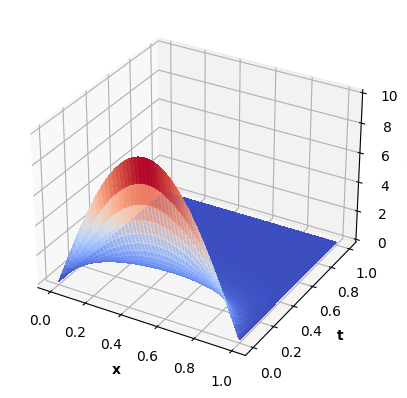

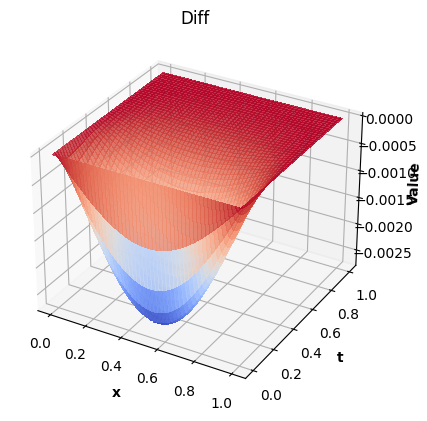

In [10]:
plot_2d((0, 1, x_step), (0, 1, t_step), analytic_func=heat_simple_solution, grid_values=cn_grid.T, z_lim=(0,10.))

|                    | Explicit        | Implicit               | Crank-Nicolson        |
|:-------------------|:---------------:|:----------------------:|:---------------------:|
| Stable             | r $\leq$ 1/2    | always                 | always                |
| Numerically        | Simple          | Intensive ($M^{-1}$)   | Intensive ($M^{-1}$)  |
| Error ($\Delta u$) | O(k)+O(h$^2$)   | O(k)+O(h$^2$)          | O(k$^2$)+O(h$^2$)     | 

# Pricing

## Call option boundary conditions:
* V(S, T) = max(S, K)
* V(0, t) = 0 (Never exercised.)
* $V(S_{max}, t) = S-K\exp(-r(T-t))$ (Always exercised -> It's a forward)

In [83]:
from scipy.stats import norm

# Contract data
K =100
T = 2.

# Market data
R = 0.05
SIGMA = 0.1

"""The pricing function of European call option"""
def black_scholes_eur_call(S0, t):
    time_to_mat = T
    d1_vec = ( np.log( S0 / K ) + ( R + 0.5 * SIGMA**2 ) * time_to_mat ) / ( SIGMA * time_to_mat**0.5 )
    d2_vec = d1_vec - SIGMA * time_to_mat**0.5

    N_d1_vec = norm.cdf(d1_vec)
    N_d2_vec = norm.cdf(d2_vec)

    return N_d1_vec * S0 - K * np.exp((-1.0)*R*time_to_mat) * N_d2_vec
    

def call_boundary(grid: np.array, dS: float, dt: float):
    """
    Assume grid is lin. spaced and grid[0,:] is S=0 and grid[:,-1] is t=T.
    """
    nS, nt = grid.shape
    S_max = (nS-1)*dS
    grid[0, :]  = 0.
    grid[-1, :] = S_max -K *np.exp(-R*(T-np.linspace(0,T, nt))) 
    grid[:,-1] = np.maximum(np.array([0]*nS), np.linspace(0, S_max, nS)-np.array([K]*nS))
    
    return grid

# Model parameters
n_S = 11
n_t = 5
S_max = 10.*K


dS = S_max/(n_S-1)
dt = T/(n_t-1)


my_grid = np.zeros((n_S, n_t))
my_grid = call_boundary(my_grid, dS, dt)
my_grid

array([[  0.        ,   0.        ,   0.        ,   0.        ,
          0.        ],
       [  0.        ,   0.        ,   0.        ,   0.        ,
          0.        ],
       [  0.        ,   0.        ,   0.        ,   0.        ,
        100.        ],
       [  0.        ,   0.        ,   0.        ,   0.        ,
        200.        ],
       [  0.        ,   0.        ,   0.        ,   0.        ,
        300.        ],
       [  0.        ,   0.        ,   0.        ,   0.        ,
        400.        ],
       [  0.        ,   0.        ,   0.        ,   0.        ,
        500.        ],
       [  0.        ,   0.        ,   0.        ,   0.        ,
        600.        ],
       [  0.        ,   0.        ,   0.        ,   0.        ,
        700.        ],
       [  0.        ,   0.        ,   0.        ,   0.        ,
        800.        ],
       [909.5162582 , 907.22565137, 904.87705755, 902.4690088 ,
        900.        ]])

# Black-Scholes equation:
$$\frac{\partial V}{\partial t}+\frac 1 2 \sigma^2 S^2 \frac{\partial ^2 V}{\partial S^2} + rS\frac{\partial V}{\partial S}-rV = 0$$

# Explicit:
* Backward time, central S differential (and $S=j\cdot\Delta S$):
$$V_{j, n-1}=\frac{\Delta t}{2}\left(\sigma^2 j^2 +rj\right)V_{j+1,n}+ \left(1-\sigma^2j^2\Delta t -r\Delta t \right)V_{j, n} + \frac{\Delta t}{2}\left(\sigma^2 j^2 - rj\right)V_{j-1, n}$$

In [116]:
def create_and_run_explicit_BS(n_S, n_t):
    dS = S_max/(n_S-1)
    dt = T/(n_t-1)
    
    explicit_grid = np.zeros((n_S, n_t))
    explicit_grid = call_boundary(explicit_grid, dS, dt)

    
    d = np.diag(1.-SIGMA**2.*np.array(range(n_S))**2.*dt-R*dt)
    dp1 = np.diag(0.5*dt*(SIGMA**2.*np.array(range(n_S-1))**2.+R*np.array(range(n_S-1)) ), 1)
    dm1 = np.diag(0.5*dt*(SIGMA**2.*np.array(range(1,n_S))**2.-R*np.array(range(1,n_S)) ), -1)
    matrix = d+dp1+dm1
    matrix = matrix[1:-1, 1:-1]
    
    for n in range(n_t-1, 0, -1):
        explicit_grid[1:-1,n-1] = np.dot(matrix, explicit_grid[:,n])[1:-1]
# The following is replaced by the matrix multiplication above:
#         for j in range(1, n_S-1, 1):
#             explicit_grid[j, n-1] =  0.5*dt*((SIGMA*j)**2.+R*j)*explicit_grid[j+1,n]
#             explicit_grid[j, n-1] += (1-dt*(SIGMA*j)**2.-R*dt)*explicit_grid[j,n]
#             explicit_grid[j, n-1] += 0.5*dt*((SIGMA*j)**2.-R*j)*explicit_grid[j-1,n]
        
    return explicit_grid
n_S, n_t = 200, 50
explicit_solution = create_and_run_explicit_BS(n_S,n_t)
Spots = np.linspace(0,S_max,n_S)

C:\Users\Farkas Ádám László\AppData\Local\Temp\ipykernel_312\4199882057.py:13: RuntimeWarning: divide by zero encountered in log
  d1_vec = ( np.log( S0 / K ) + ( R + 0.5 * SIGMA**2 ) * time_to_mat ) / ( SIGMA * time_to_mat**0.5 )


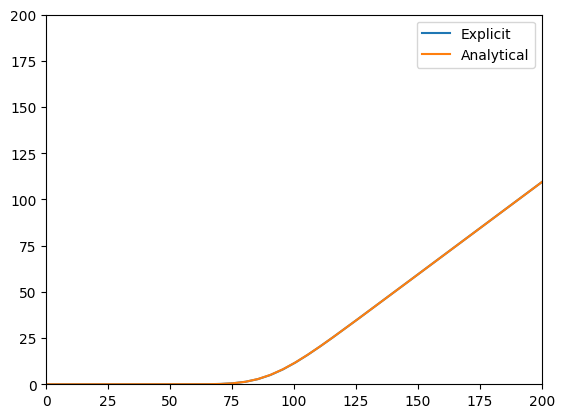

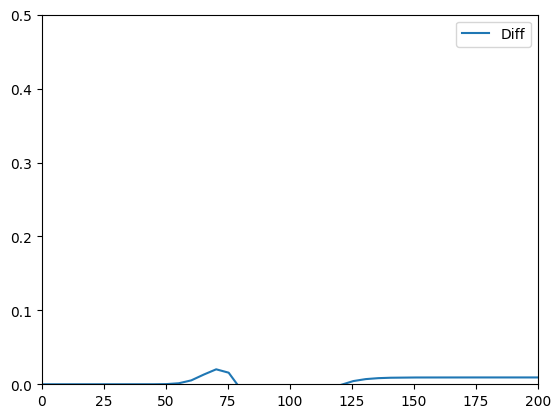

In [117]:
plt.plot(Spots, explicit_solution[:n_S,0], label="Explicit")
plt.plot(Spots, black_scholes_eur_call(Spots, t_s), label="Analytical")
plt.xlim(0, 2*K)
plt.ylim(0,200)
plt.legend()
plt.show()

plt.plot(Spots, explicit_solution[:n_S,0]-black_scholes_eur_call(Spots, t_s), label="Diff")
plt.xlim(0, 2*K)
plt.ylim(0,0.5)
plt.legend()
plt.show()

# Black-Scholes equation:
$$\frac{\partial V}{\partial t}+\frac 1 2 \sigma^2 S^2 \frac{\partial ^2 V}{\partial S^2} + rS\frac{\partial V}{\partial S}-rV = 0$$

# Implicit:
* Forward time, central S differential (and $S=j\cdot\Delta S$):
$$\frac{\Delta t}{2}\left(rj-\sigma^2j^2\right)V_{j-1,n} + \left(1+\Delta t(\sigma^2j^2+r)\right)V_{j,n} - \frac{\Delta t}{2}\left(rj+\sigma^2 j^2\right)V_{j+1,n}=V_{j, n+1}$$

In [233]:
def create_and_run_implicit_BS(n_S, n_t):
    dS = S_max/(n_S-1)
    dt = T/(n_t-1)
    
    implicit_grid = np.zeros((n_S, n_t))
    implicit_grid = call_boundary(implicit_grid, dS, dt)

    
    #diagonal, first element at matrix[0,0], thereofre j start from 0
    d = np.diag(1.+dt*(SIGMA**2.*np.array(range(n_S))**2.+R))
    #above diagonal, first element at matrix[0,1], thereofre j start from 0
    dp1 = np.diag(0.5*dt*(SIGMA**2.*np.array(range(n_S-1))**2.+R*np.array(range(n_S-1)) ), 1)
    #below diagonal, first element at matrix[1,0], thereofre j start from 1
    dm1 = np.diag(0.5*dt*(-SIGMA**2.*np.array(range(1,n_S))**2.+R*np.array(range(1,n_S)) ), -1)
    
    matrix = d+dp1+dm1
    
    for n in range(n_t-1, 0, -1):
        boundary = np.dot(matrix, implicit_grid[:,n-1])
        print(boundary)
#         boundary = np.zeros(n_S)
        implicit_grid[1:-1,n-1] = linalg.solve(matrix[1:-1,1:-1], implicit_grid[1:-1,n]-boundary[1:-1])
        
    return implicit_grid
n_S, n_t = 101, 11
implicit_solution = create_and_run_implicit_BS(n_S,n_t)
Spots = np.linspace(0,S_max,n_S)
# for S, V in zip(Spots, implicit_solution[:,0]):
#     print(S, V)
implicit_solution

[    0.             0.             0.             0.
     0.             0.             0.             0.
     0.             0.             0.             0.
     0.             0.             0.             0.
     0.             0.             0.             0.
     0.             0.             0.             0.
     0.             0.             0.             0.
     0.             0.             0.             0.
     0.             0.             0.             0.
     0.             0.             0.             0.
     0.             0.             0.             0.
     0.             0.             0.             0.
     0.             0.             0.             0.
     0.             0.             0.             0.
     0.             0.             0.             0.
     0.             0.             0.             0.
     0.             0.             0.             0.
     0.             0.             0.             0.
     0.             0.             0.         

array([[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 3.62641431e-09,  1.91315968e-09,  9.47685118e-10, ...,
         1.04378826e-12,  1.06332342e-13,  0.00000000e+00],
       [-2.92795268e-07, -1.64738746e-07, -8.73035844e-08, ...,
        -1.58330230e-10, -1.79347217e-11,  0.00000000e+00],
       ...,
       [ 1.72260350e+02,  1.72087978e+02,  1.71913873e+02, ...,
         1.71438185e+02,  1.93383132e+02,  8.80000000e+02],
       [-3.95723473e+02, -3.95327653e+02, -3.94927855e+02, ...,
        -3.88654951e+02, -3.19572155e+02,  8.90000000e+02],
       [ 9.09516258e+02,  9.08606881e+02,  9.07688365e+02, ...,
         9.01980133e+02,  9.00995017e+02,  9.00000000e+02]])

C:\Users\Farkas Ádám László\AppData\Local\Temp\ipykernel_312\4199882057.py:13: RuntimeWarning: divide by zero encountered in log
  d1_vec = ( np.log( S0 / K ) + ( R + 0.5 * SIGMA**2 ) * time_to_mat ) / ( SIGMA * time_to_mat**0.5 )


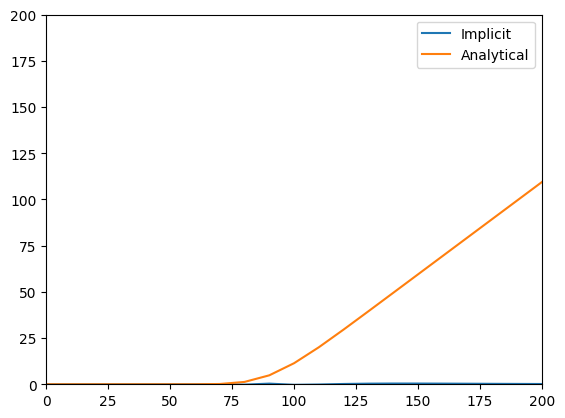

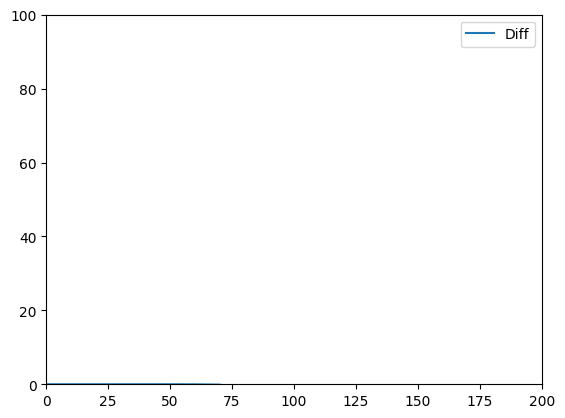

In [234]:
plt.plot(Spots, implicit_solution[:n_S,0], label="Implicit")
plt.plot(Spots, black_scholes_eur_call(Spots, t_s), label="Analytical")
plt.xlim(0, 2*K)
plt.ylim(0,200)
plt.legend()
plt.show()

plt.plot(Spots, implicit_solution[:n_S,0]-black_scholes_eur_call(Spots, t_s), label="Diff")
plt.xlim(0, 2*K)
plt.ylim(0,100)
plt.legend()
plt.show()

# Black-Scholes equation:
$$\frac{\partial V}{\partial t}+\frac 1 2 \sigma^2 S^2 \frac{\partial ^2 V}{\partial S^2} + rS\frac{\partial V}{\partial S}-rV = 0$$

# Crank-Nicolson:
* Forward time, central S differential (and $S=j\cdot\Delta S$):
$$\frac{\Delta t}{2}(rj-\sigma^2j^2)V_{j-1, n-1} + (2+\sigma^2j^2\Delta t+r\Delta t)V_{j, n-1} -\frac{\Delta t}{2}(\sigma^2j^2+rj)V_{j+1, n-1} =$$
$$=\frac{\Delta t}{2}(\sigma^2j^2-rj)V_{j-1,n}+(2-\sigma^2j^2\Delta t -r\Delta t)V_{j,n}+ \frac{\Delta t}{2}(\sigma^2j^2+rj)V_{j+1,n}$$